# Activity 1.3 : Regularization

#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST 


#### Procedures
Load the necessary libraries

In [18]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [19]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Get the size of the sample train data

In [20]:
x_train[0].shape

(28, 28)

Check the sample train data

In [21]:
x_train[333] 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

Check the corresponding label in the training set

In [22]:

y_train[333]

8

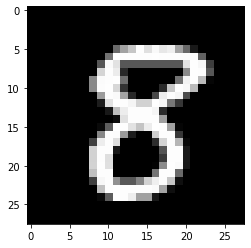

In [23]:

plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [24]:

print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [25]:

x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255


Convert class vectors to binary class matrices

In [26]:
from keras.utils import np_utils
num_classes = 10
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

* Build the model with two hidden layers of size 512. 
* Use dropout of 0.2 
* Check the model summary

In [27]:

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [29]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 12s 6ms/step - loss: 0.5127 - accuracy: 0.8468 - val_loss: 0.2122 - val_accuracy: 0.9372
Epoch 2/30
469/469 [==============================] - 2s 5ms/step - loss: 0.2548 - accuracy: 0.9249 - val_loss: 0.1527 - val_accuracy: 0.9548
Epoch 3/30
469/469 [==============================] - 3s 6ms/step - loss: 0.2062 - accuracy: 0.9395 - val_loss: 0.1304 - val_accuracy: 0.9601
Epoch 4/30
469/469 [==============================] - 3s 5ms/step - loss: 0.1747 - accuracy: 0.9489 - val_loss: 0.1151 - val_accuracy: 0.9676
Epoch 5/30
469/469 [==============================] - 3s 5ms/step - loss: 0.1552 - accuracy: 0.9534 - val_loss: 0.1147 - val_accuracy: 0.9666
Epoch 6/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1429 - accuracy: 0.9574 - val_loss: 0.1043 - val_accuracy: 0.9713
Epoch 7/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1340 - accuracy: 0.9596 - val_loss: 0.1008 - val_accuracy: 0.9711
Epoch

Use Keras evaluate function to evaluate performance on the test set

In [30]:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10679236054420471
Test accuracy: 0.977400004863739


The test loss and test accuracy are actually good.This means that our NN model learned well from the training and was able to predict the test values well.

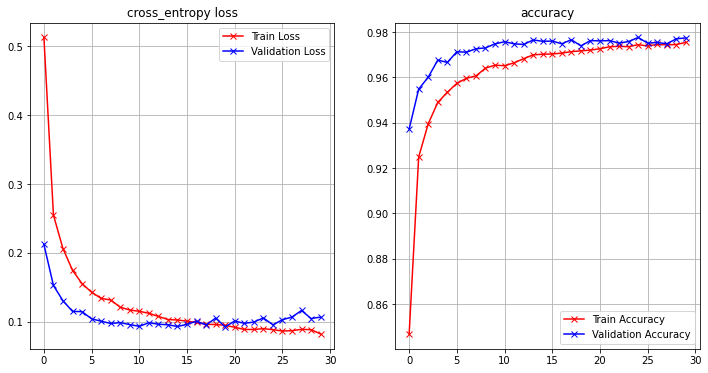

In [31]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

The results show that the test loss may have started out lower but it ended up higher than the training loss from iteration 14 and onwards. Despite the increase in the test loss the accuracy for the test dataset remained high and seemed to have plateaued near and a little lower than 0.98 starting from iteration 15. I suspect that an increase in iterations/epochs could maybe see an increase in loss for the validation set and maybe a little decrease in the validation accuracy.

#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128

In [32]:
model_1 = Sequential()
model_1.add(Dense(400, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.4))
model_1.add(Dense(300, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.4))
model_1.add(Dense(10, activation='softmax'))

In [33]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 400)               314000    
                                                                 
 dropout_6 (Dropout)         (None, 400)               0         
                                                                 
 dense_10 (Dense)            (None, 300)               120300    
                                                                 
 dropout_7 (Dropout)         (None, 300)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                3010      
                                                                 
Total params: 437,310
Trainable params: 437,310
Non-trainable params: 0
_________________________________________________________________


model_1 has 437,310 parameters that are trainbale, certainly higher than the previous model

In [34]:
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 20
history_1 = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 13s 23ms/step - loss: 0.3245 - accuracy: 0.9011 - val_loss: 0.1372 - val_accuracy: 0.9589
Epoch 2/20
469/469 [==============================] - 10s 22ms/step - loss: 0.1504 - accuracy: 0.9564 - val_loss: 0.0881 - val_accuracy: 0.9714
Epoch 3/20
469/469 [==============================] - 11s 24ms/step - loss: 0.1174 - accuracy: 0.9656 - val_loss: 0.0897 - val_accuracy: 0.9742
Epoch 4/20
469/469 [==============================] - 11s 24ms/step - loss: 0.1001 - accuracy: 0.9708 - val_loss: 0.0786 - val_accuracy: 0.9778
Epoch 5/20
469/469 [==============================] - 12s 25ms/step - loss: 0.0904 - accuracy: 0.9741 - val_loss: 0.0917 - val_accuracy: 0.9752
Epoch 6/20
469/469 [==============================] - 13s 27ms/step - loss: 0.0841 - accuracy: 0.9762 - val_loss: 0.0800 - val_accuracy: 0.9804
Epoch 7/20
469/469 [==============================] - 12s 26ms/step - loss: 0.0771 - accuracy: 0.9785 - val_loss: 0.0812 - val_accuracy:

6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [ ]:
model_2 = Sequential()

#### Conclusion

#type your answer here